# Binary Logistic Regression in Pure Python

In [1]:
from __future__ import print_function # for python 2 and 3 compatibility
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the iris dataset

In [2]:
df_iris = pd.read_csv('iris.csv', header=None,
                      names=['sepal_length', 'sepal_width', 'label_str'])

# add bias feature
df_iris['bias'] = 1

# make column with binary label
str_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_iris['label_int'] = df_iris['label_str'].apply(lambda label_str: str_to_int[label_str])
df_iris.tail()

# select data, features, labels
X = df_iris[['sepal_length', 'sepal_width', 'bias']]
y = df_iris['label_int']
X, y = X[:100], y[:100] # use 2 labels only (binary classification)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Construct the model

In [3]:
class BinaryLogisticRegressorPurePython(object):
    
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            p_y = self.sigmoid_fn(X)
            error = (y - p_y)
            self.w_[1:] += self.lr * X.T.dot(error) 
            self.w_[0] += self.lr * error.sum()
            
            cost = -y.dot(np.log(p_y)) - ((1 - y).dot(np.log(1 - p_y)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.sigmoid_fn(X) >= 0.5, 1, 0)
    
    def sigmoid_fn(self, X):
        z = self.net_input(X)
        sigmoid = 1.0 / (1.0 + np.exp(-z))
        return sigmoid

## Fit and evaluate model

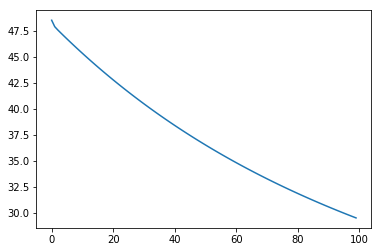

In [4]:
# fit model
model_3 = BinaryLogisticRegressorPurePython(n_iter=100, lr=0.001)
model_3.fit(X_train.values, y_train.values)
plt.plot(model_3.cost_)
plt.show()

In [5]:
# evaluate model
train_acc = np.sum(model_3.predict(X_train) == y_train) / float(len(X_train))
test_acc = np.sum(model_3.predict(X_test) == y_test) / float(len(X_test))
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.985714285714
Test accuracy: 1.0


## Optional: Tensorflow Implementation

In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


# define model input
def input_fn(X, y):
    feature_cols = {name: tf.constant(X[name].values) for name in ['sepal_length', 'sepal_width']}
    label = tf.constant(y.values)
    return feature_cols, label


# define features
sepal_length = tf.contrib.layers.real_valued_column('sepal_length')
sepal_width = tf.contrib.layers.real_valued_column('sepal_width')

# instantiate and fit model
model_2 = tf.contrib.learn.LinearClassifier(feature_columns=[sepal_length, sepal_width])
model_2.fit(input_fn=lambda: input_fn(X_train, y_train), steps=100)

# evaluate model
train_acc = model_2.evaluate(input_fn=lambda: input_fn(X_train, y_train), steps=1)['accuracy']
test_acc = model_2.evaluate(input_fn=lambda: input_fn(X_test, y_test), steps=1)['accuracy']
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.985714256763
Test accuracy: 1.0
